In [1]:
# importing necessary liberary
import numpy as np  
import pandas as pd  
import pymongo
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import pickle
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('processed_data.csv')

In [4]:
df['Year']  = df['Year'].astype(int)
df['Weekly_Sales']  = df['Weekly_Sales'].astype(float)
df['Holiday_Flag']  = df['Holiday_Flag'].astype(int)
df['Temperature']  = df['Temperature'].astype(float)
df['Fuel_Price']  = df['Fuel_Price'].astype(float)
df['CPI']  = df['Fuel_Price'].astype(float)
df['Unemployment']  = df['Unemployment'].astype(float)
df['Store']  = df['Store'].astype(int)
df['Year']  = df['Year'].astype(int)


In [5]:
df.head()

Unnamed: 0  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0           0      1    1643690.90             0        42.31       2.572   
1           1      1    1641957.44             1        38.51       2.548   
2           2      1    1611968.17             0        39.93       2.514   
3           3      1    1409727.59             0        46.63       2.561   
4           4      1    1554806.68             0        46.50       2.625   

     CPI  Unemployment       Day     Month  Year  
0  2.572         8.106  Thursday  February  2010  
1  2.548         8.106  Thursday  February  2010  
2  2.514         8.106  Thursday  February  2010  
3  2.561         8.106  Thursday  February  2010  
4  2.625         8.106  Thursday     March  2010

<Axes: xlabel='Year', ylabel='count'>

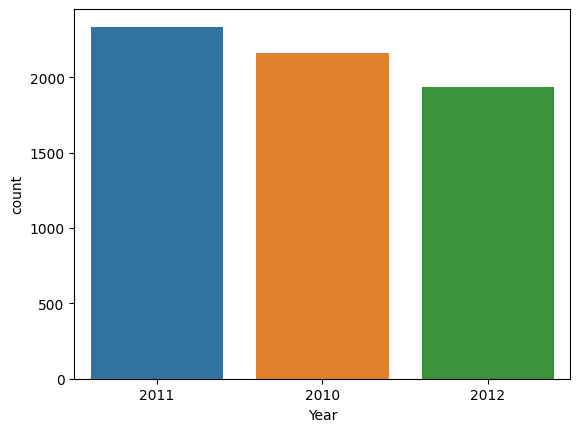

In [6]:
#lets find the number of rows in each of the year and arrange them in the descending order 
# Using the countplot function, to create a bar plot that shows the counts of unique values in the 'Year' column of the DataFrame (df).
sns.countplot(x='Year', data=df,order=df['Year'].value_counts().index)

<Axes: xlabel='Day', ylabel='count'>

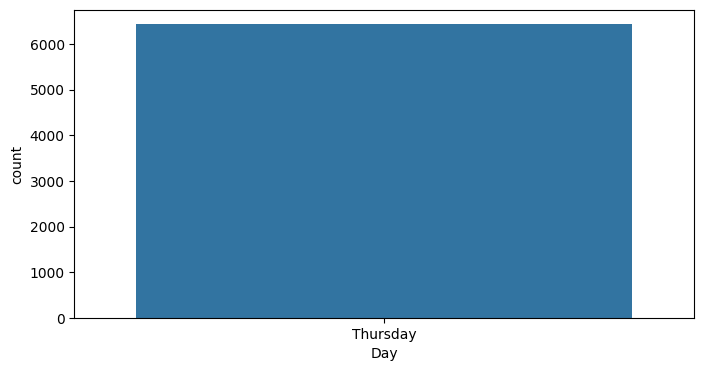

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='Day', data=df,order=df['Day'].value_counts().index)

<Axes: xlabel='Month', ylabel='count'>

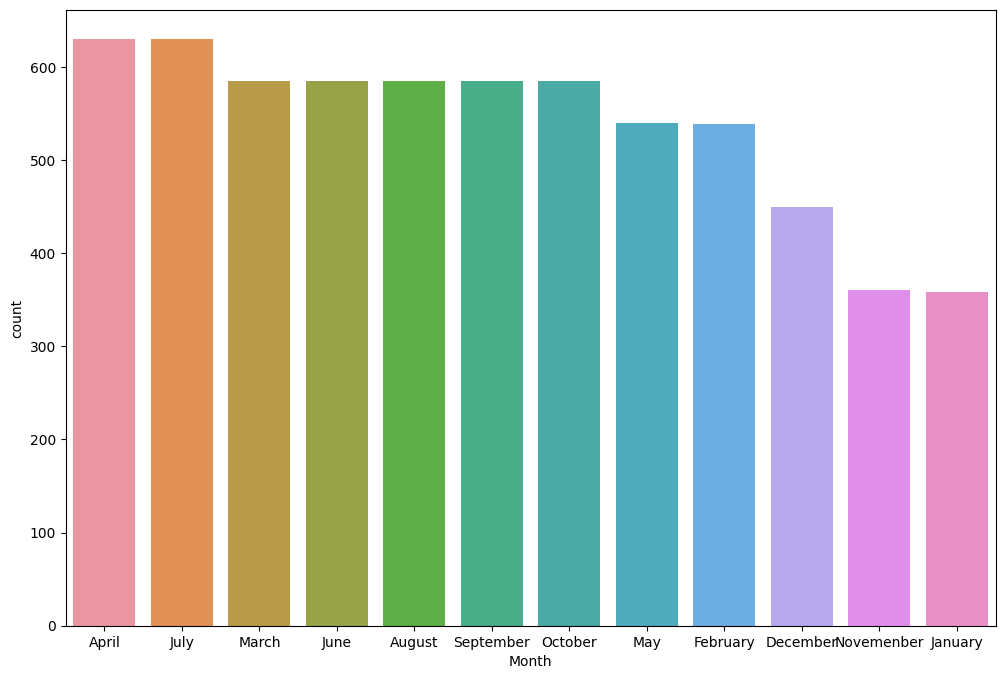

In [8]:
'''
a bar plot that visualizes the distribution of months in the 'Month' column of the DataFrame, 
ordered by the frequency of each month in descending order. This type of plot is useful for understanding
the distribution of data across different months in a categorical variable.
'''
plt.figure(figsize=(12,8))
sns.countplot(x='Month', data=df,order=df['Month'].value_counts().index)

In [9]:
# finding sum of the weekly sales for each of the year
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.445741e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

2011 has highest total weekly sales based on data. Thats because the database has more number of records of 2011. 

Text(0.5, 1.0, 'Annual Sales')

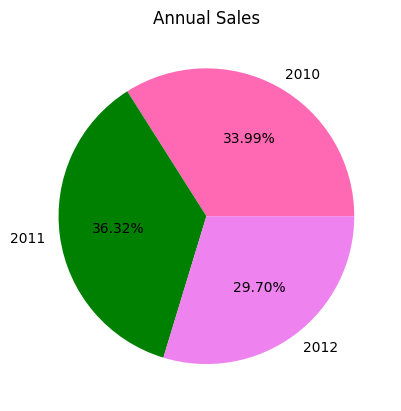

In [10]:
'''
This code creates a pie chart representing the distribution of annual sales for each unique year in the 'Year' column of the DataFrame,
with percentages displayed on each wedge and custom colors. The title of the pie chart is set to 'Annual Sales'.
'''
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

In [11]:
df2 = df.groupby('Day')['Weekly_Sales'].sum().reset_index()
df2.head(10)

Day  Weekly_Sales
0  Thursday  6.734760e+09

Aggregating the data based on a specific column 'Day' and calculating some summary statistic (in this case, the sum of 'Weekly_Sales') for each group.

([<matplotlib.patches.Wedge at 0x2b617eb7610>],
 [Text(-1.1, 1.3471114790620887e-16, 'Thursday')],
 [Text(-0.6, 7.347880794884119e-17, '100.00%')])

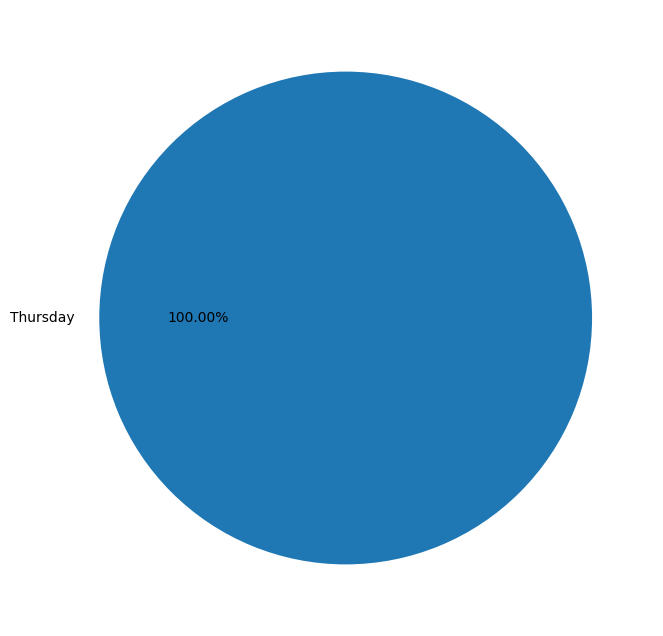

In [12]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['Day'],autopct='%1.2f%%', normalize=True)

Pie chart to visualize the proportion of total sales for each unique day in the 'Day' column of the DataFrame df2. The percentages are displayed on each wedge with two decimal places, and the values are normalized to represent proportions.

Thursday had the highest total sales compared to the other days of the week.

### Insight: 
Although the tuesday seems to be the day which has the higest sales, this is not the true instight because the weekly sales is only recorder in tuesday


In [13]:
df3 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
df3.head()

Month  Weekly_Sales
0     April  6.468598e+08
1    August  6.130902e+08
2  December  5.768386e+08
3  February  5.681699e+08
4   January  3.306979e+08

This cell represent total weekly sales grouping by the 'Month' column.

([<matplotlib.patches.Wedge at 0x2b619fec1d0>,
 [Text(1.0503018019451353, 0.3269038464607015, 'April'),
  Text(0.692799612204105, 0.8544171682087397, 'August'),
  Text(0.13850358044067654, 1.0912455077594194, 'December'),
  Text(-0.4363200150178702, 1.0097647471043965, 'February'),
  Text(-0.8096190552244932, 0.7446589725622054, 'January'),
  Text(-1.0552691790490203, 0.31049470164433907, 'July'),
  Text(-1.048405159776804, -0.33293636171703156, 'June'),
  Text(-0.7055587754773202, -0.8439116152459005, 'March'),
  Text(-0.17518468221722183, -1.0859605550462923, 'May'),
  Text(0.3172933815126852, -1.0532449430442312, 'Novemenber'),
  Text(0.7562608341951716, -0.7987925579663491, 'October'),
  Text(1.060154503295749, -0.2933810306440141, 'September')],
 [Text(0.5728918919700737, 0.1783111889785644, '9.60%'),
  Text(0.3778906975658754, 0.46604572811385797, '9.10%'),
  Text(0.07554740751309628, 0.5952248224142287, '8.57%'),
  Text(-0.2379927354642928, 0.5507807711478525, '8.44%'),
  Text(-

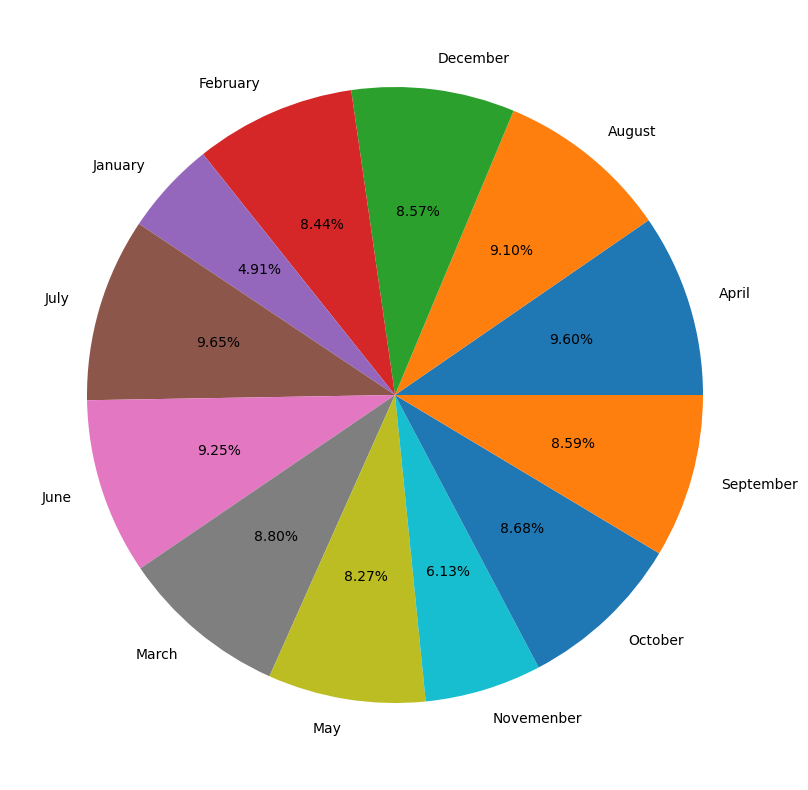

In [14]:
plt.figure(figsize=(10,10))
plt.pie(df3['Weekly_Sales'],labels=df3['Month'],normalize=True,autopct='%1.2f%%')

April had the highest total sales compared to the other months of the year.

([<matplotlib.patches.Wedge at 0x2b61a255e10>,
 [Text(-0.25688599722092664, -1.0695838370281268, 'Non Special Holiday Week'),
  Text(0.32694587837132966, 1.3612885045485397, 'Special Holiday Week')],
 [Text(-0.14011963484777815, -0.5834093656517054, '92.50%'),
  Text(0.21017949323871188, 0.8751140386383469, '7.50%')])

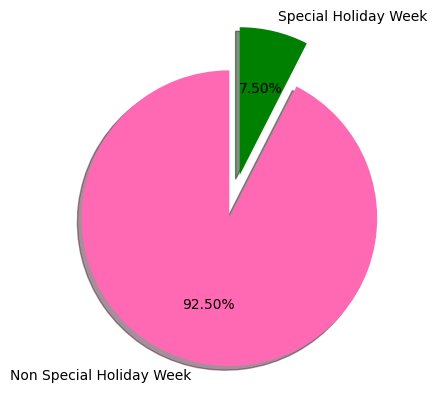

In [15]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

The code represent pie chart representing the distribution of total sales for special and non-special holiday weeks. The 'Special Holiday Week' wedge is exploded (moved outward) for emphasis, and the chart includes a shadow effect for better visualization.

In [16]:
df.groupby('Store')['Weekly_Sales'].count().reset_index()

Store  Weekly_Sales
0       1           143
1       2           143
2       3           143
3       4           143
4       5           143
5       6           143
6       7           142
7       8           143
8       9           143
9      10           143
10     11           143
11     12           143
12     13           143
13     14           143
14     15           143
15     16           143
16     17           142
17     18           143
18     19           143
19     20           143
20     21           143
21     22           143
22     23           143
23     24           143
24     25           143
25     26           142
26     27           143
27     28           143
28     29           143
29     30           143
30     31           143
31     32           143
32     33           143
33     34           143
34     35           143
35     36           143
36     37           143
37     38           143
38     39           143
39     40           143
40     41           143
41     42           143
42     43           143
43     44           143
44     45           143

In [17]:
#aggregate sales data based on the 'Store' column, calculating the total weekly sales for each unique store.
df.groupby('Store')['Weekly_Sales'].sum().reset_index()

Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.104025e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.266991e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.425989e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813419e+08
41     42  7.956575e+07
42     43  9.056544e+07
43     44  4.329309e+07
44     45  1.123953e+08

In [18]:
# maximum total weekly sales among all the stores
df.groupby('Store')['Weekly_Sales'].sum().max()

301397792.46

#### **Observation:**
* 2011 has recorded highest number of sales then followed by 2010 and 2012.
* More than 50% of sales happen on Thursday.
* Highest sales are recorded in April then followed by May, October, December ,September although their is little variance.
* Most sales comes on non special holiday week which makes sense people may not want to spend their special grocery shopping they would probably shop before to celebrate their special holiday. Like for Christmas week, people go for shopping on weeks before. 
* All stores have equal number of sales yet store 20 has recorded highest sales.

# Distributions


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

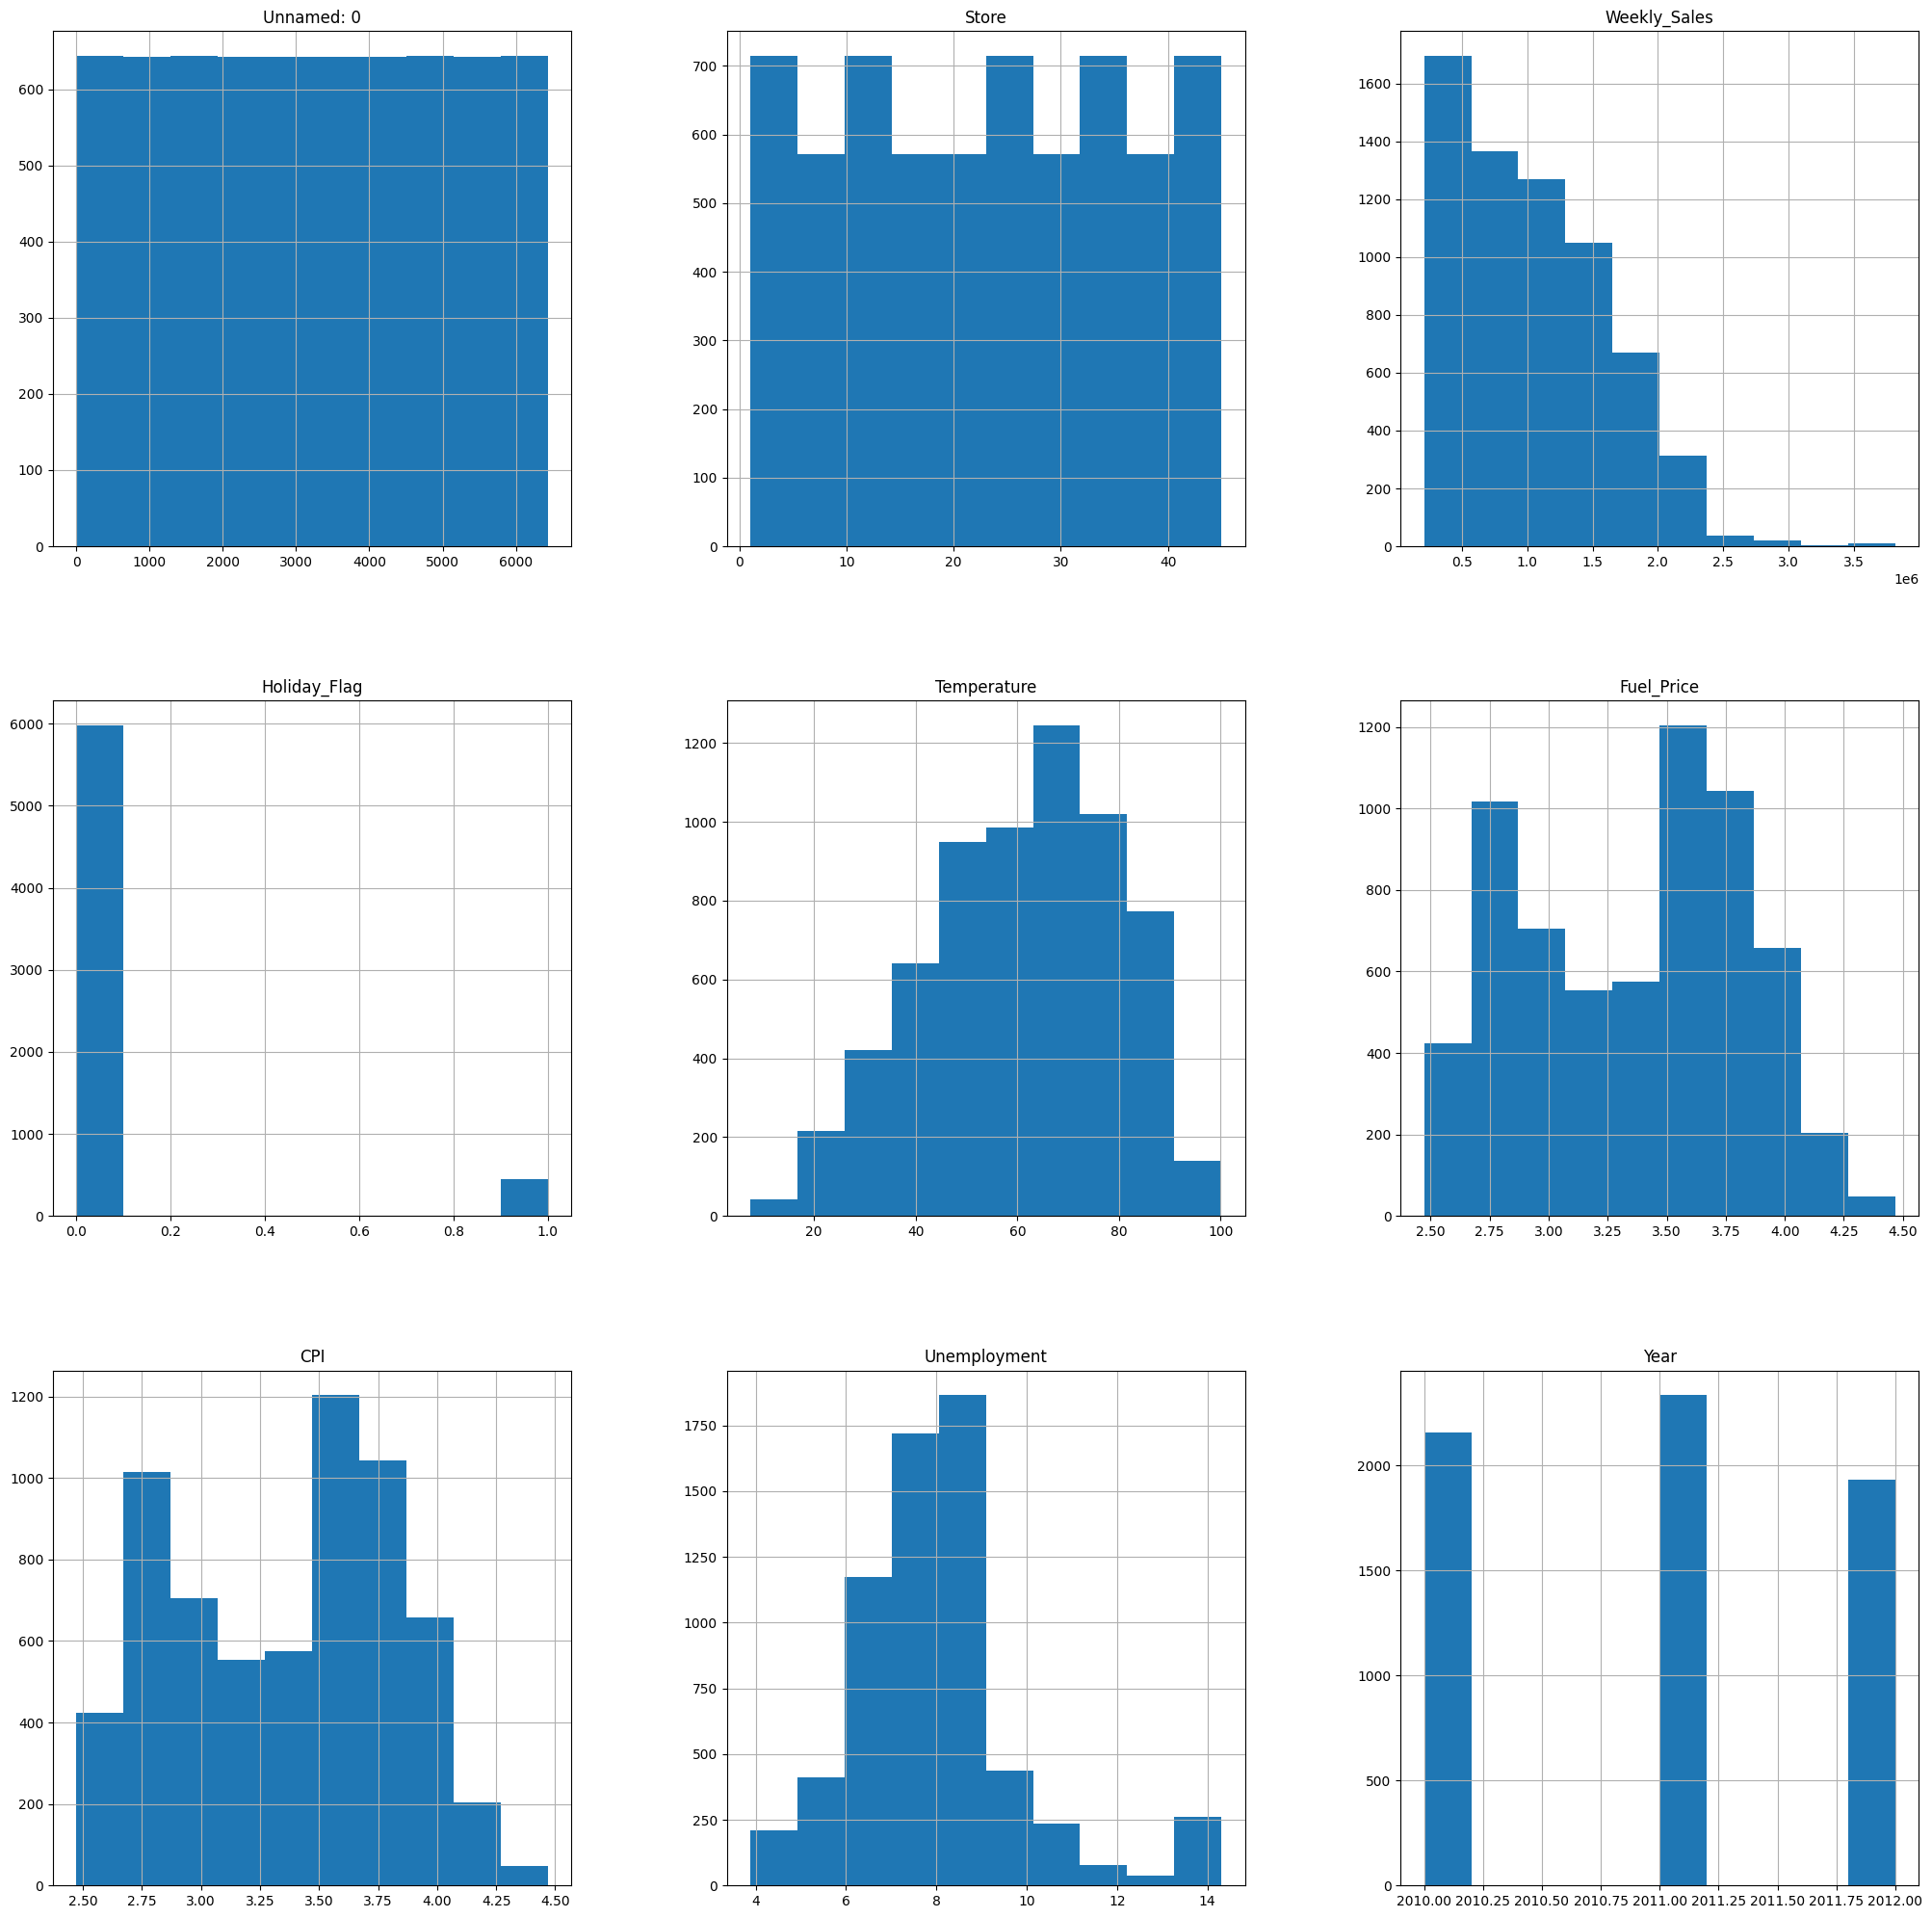

In [19]:
# creating a histogram for each numerical column
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

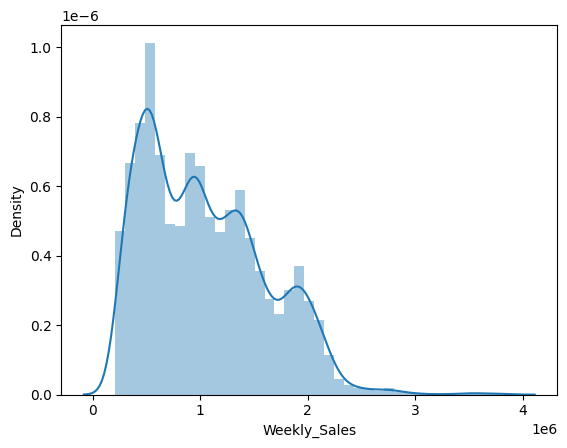

In [20]:
# create a distribution plot (histogram) for the 'Weekly_Sales' column
sns.distplot(df['Weekly_Sales'],kde=True)

The resulting plot will show a histogram of the distribution of weekly sales values, and the KDE plot provides a smoothed curve that estimates the 
underlying probability density.

The figure shows the right skewed data for the 'weekly sales' column.

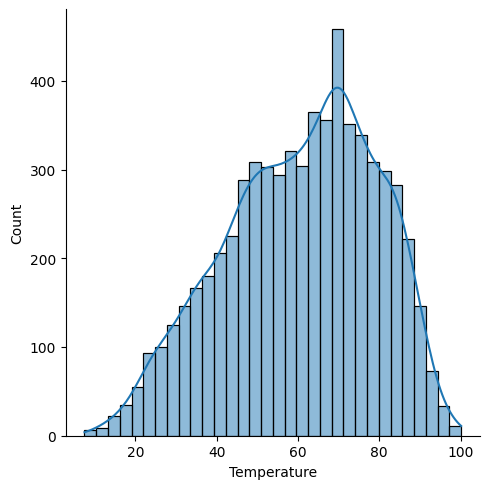

In [21]:
sns.displot(df['Temperature'],kde=True)

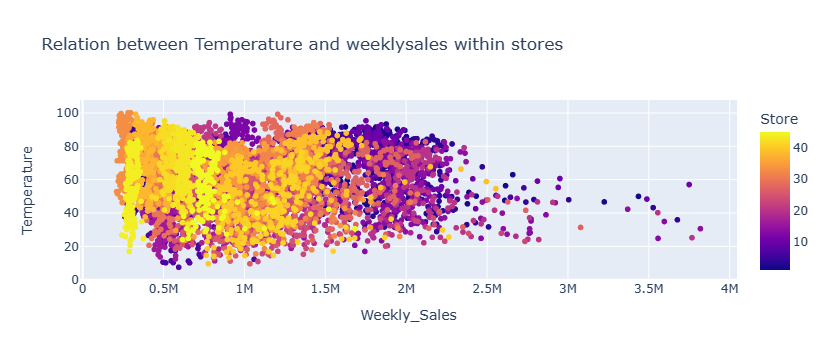

<Figure size 2000x500 with 0 Axes>

In [22]:
plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Temperature", color="Store",
                 title="Relation between Temperature and weeklysales within stores")

fig.show()

Weeklysales increase in range temp [40 , 80]

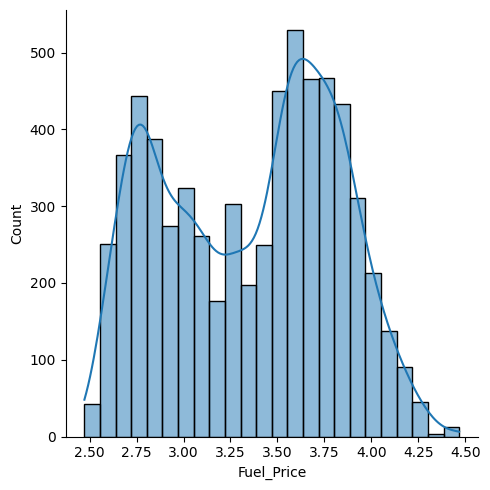

In [23]:
sns.displot(df['Fuel_Price'],kde=True)

This data distribution has two distinct peaks, it is often referred to as a "bimodal" distribution. In a bimodal distribution, there are two modes, or peaks, indicating that the data has two regions of relatively high frequency or probability.

<Axes: >

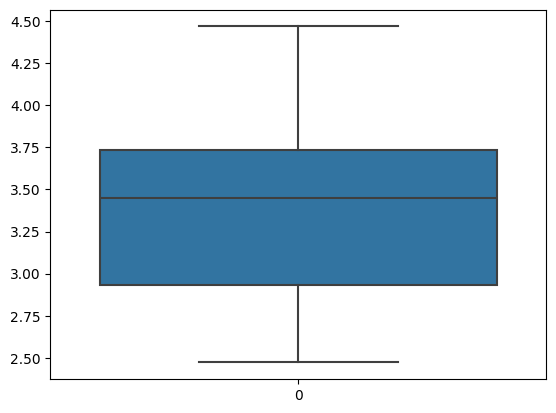

In [24]:
sns.boxplot(df['Fuel_Price'])

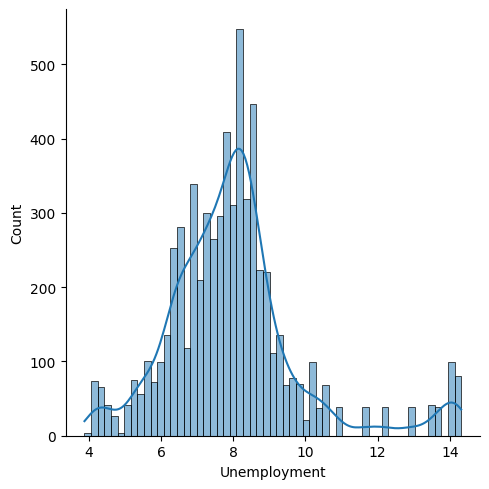

In [25]:
sns.displot(df['Unemployment'],kde=True)

<Axes: >

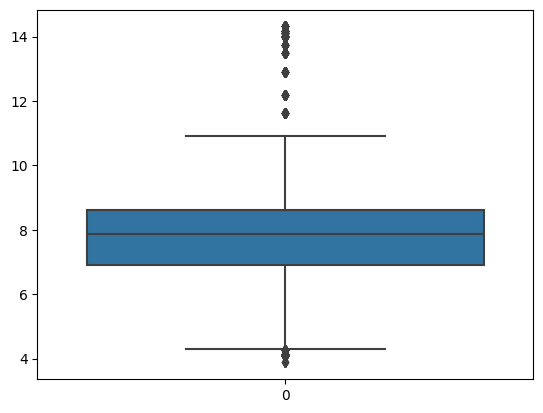

In [26]:
sns.boxplot(df['Unemployment'])

<Axes: xlabel='CPI', ylabel='Density'>

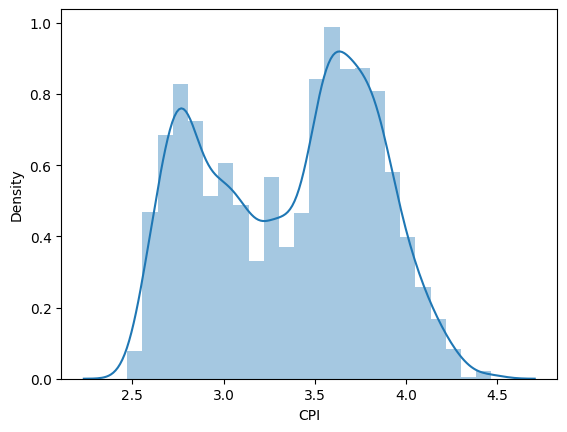

In [27]:
sns.distplot(df['CPI'],kde=True)

The above diagram is bimodal with large CPI value at range(130-140) and at range(180-225). 

### Applying Power Transformation on numeric columns 

In [28]:
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

Unnamed: 0  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0           0      1    1643690.90             0    -1.020386   -1.683290   
1           1      1    1641957.44             1    -1.207177   -1.732439   
2           2      1    1611968.17             0    -1.137996   -1.801885   
3           3      1    1409727.59             0    -0.801827   -1.705830   
4           4      1    1554806.68             0    -0.808497   -1.574385   

        CPI  Unemployment       Day     Month  Year  
0 -1.683290      0.185783  Thursday  February  2010  
1 -1.732439      0.185783  Thursday  February  2010  
2 -1.801885      0.185783  Thursday  February  2010  
3 -1.705830      0.185783  Thursday  February  2010  
4 -1.574385      0.185783  Thursday     March  2010

The Box-Cox transformation, implemented through the PowerTransformer, is useful for handling skewness and making the distribution more normal

# Data Preprocessing
* Removal of Outliers - Unemployment 
* Encoding - categorical varaible - Target Encoding

In [29]:
df.shape

(6432, 11)

In [30]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
df.shape


(5919, 11)

In [31]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]

df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(5919, 11)

## Box plot after removal of the outliers

<Axes: >

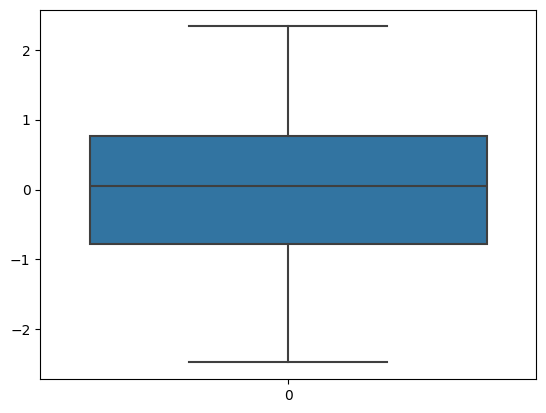

In [32]:
sns.boxplot(df['Temperature'])

<Axes: >

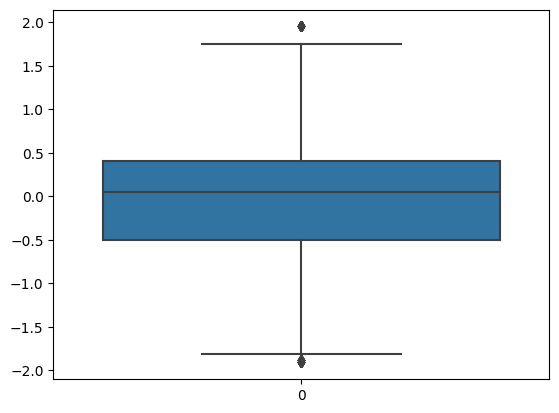

In [33]:
sns.boxplot(df['Unemployment'])

## Encodeing

In [34]:
# tranformation of distributions
# how to find multi colinearity and use feature selection

# Data Manipulation
* Encoding - using column transormer 
* Scaling
* Splitting data

In [35]:
# Target guided encoding of day ,month, year column - ranked as per the sales
tge= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df['Day'] = df['Day'].map(tge)
df.head()

Unnamed: 0  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0           0      1    1643690.90             0    -1.020386   -1.683290   
1           1      1    1641957.44             1    -1.207177   -1.732439   
2           2      1    1611968.17             0    -1.137996   -1.801885   
3           3      1    1409727.59             0    -0.801827   -1.705830   
4           4      1    1554806.68             0    -0.808497   -1.574385   

        CPI  Unemployment  Day     Month  Year  
0 -1.683290      0.185783    6  February  2010  
1 -1.732439      0.185783    6  February  2010  
2 -1.801885      0.185783    6  February  2010  
3 -1.705830      0.185783    6  February  2010  
4 -1.574385      0.185783    6     March  2010

In [36]:
yr = {2010:1, 2011:2, 2012:0}
df['Year'] = df['Year'].map(yr)
df.head()

Unnamed: 0  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0           0      1    1643690.90             0    -1.020386   -1.683290   
1           1      1    1641957.44             1    -1.207177   -1.732439   
2           2      1    1611968.17             0    -1.137996   -1.801885   
3           3      1    1409727.59             0    -0.801827   -1.705830   
4           4      1    1554806.68             0    -0.808497   -1.574385   

        CPI  Unemployment  Day     Month  Year  
0 -1.683290      0.185783    6  February     1  
1 -1.732439      0.185783    6  February     1  
2 -1.801885      0.185783    6  February     1  
3 -1.705830      0.185783    6  February     1  
4 -1.574385      0.185783    6     March     1

In [37]:
mn = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,'August':5,'September':7,'October':10,'Novemenber':2,'December':9}
df['Month'] = df['Month'].map(mn)
df.head()

Unnamed: 0  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0           0      1    1643690.90             0    -1.020386   -1.683290   
1           1      1    1641957.44             1    -1.207177   -1.732439   
2           2      1    1611968.17             0    -1.137996   -1.801885   
3           3      1    1409727.59             0    -0.801827   -1.705830   
4           4      1    1554806.68             0    -0.808497   -1.574385   

        CPI  Unemployment  Day  Month  Year  
0 -1.683290      0.185783    6      3     1  
1 -1.732439      0.185783    6      3     1  
2 -1.801885      0.185783    6      3     1  
3 -1.705830      0.185783    6      3     1  
4 -1.574385      0.185783    6      4     1

# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

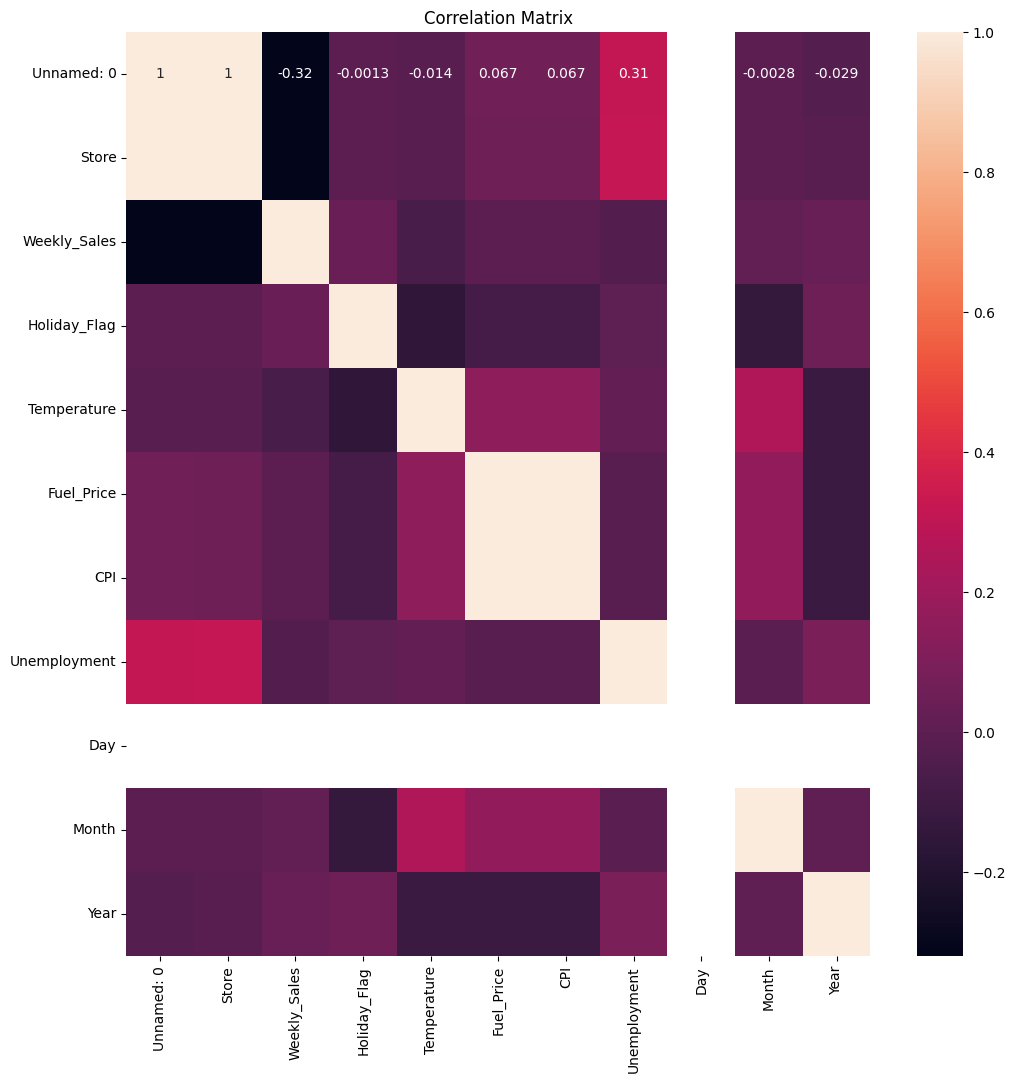

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

There is no strong correlation between features and target variable and also between the features themselves.

### Pearson Correlation:
Pearson Correlation The Pearson Correlation measures the linear dependence between two variables X and Y.

The result of the pearson correlation gives the coefficient between -1 and 1 inclusive, where coefficient=1, means Perfect positive linear correlation,
coefficient=0, means, there is no correlation between the dependent and independent variables and coefficient=-1 means, Perfect negative linear correlation. 

#### P-Value:
The P-value is the probability value that the correlation between these two variables is statistically significant. Usually, 0.05 is choosen as a significance level, 
which means we are 96% confident that the there is a significant correlation between the dependent and independent variables.

p-value < 0.001: we say there is strong evidence that the correlation is significant.
p-value is < 0.05: there is moderate evidence that the correlation is significant. 
p-value is < 0.1: there is weak evidence that the correlation is significant.
p-value is > 0.1: there is no evidence that the correlation is significant.

The Pearson Correlation Coefficient is 5.808095505352465e-06  with a P-value of P = 0.9996435437521263


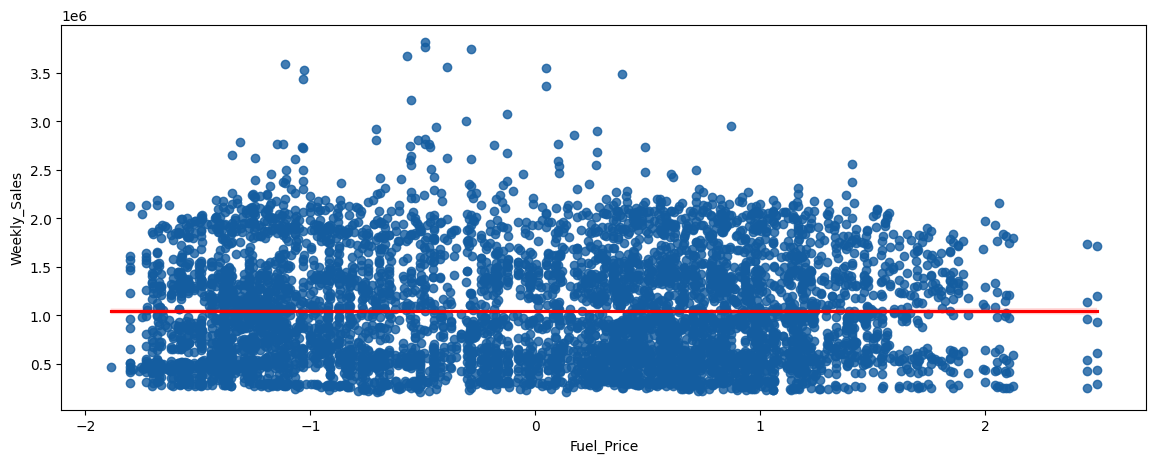

In [39]:
# Fuel Price vs. Weekly Sales
pearson_coef, p_value = stats.pearsonr(df['Fuel_Price'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Fuel_Price', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

The Pearson correlation coefficient is very close to 0 (0.00011925976638962028), and the p-value is high (P = 0.9926789994996457).
A high p-value suggests that there is no significant evidence to reject the null hypothesis that there is no correlation.

Given the close-to-zero correlation coefficient and the high p-value, it indicates that there is no significant linear correlation between the two variables. In other words, there is little to no linear relationship between the variables.

In [40]:
# Unemployment vs. Weekly Sales
pearson_coef, p_value = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.03484819786169707  with a P-value of P = 0.007333772381889686


The Pearson correlation coefficient is -0.034978370135896504. Since this value is close to 0, it suggests a very weak negative linear correlation.

The p-value associated with the correlation coefficient is P = 0.007102503143908282. The p-value helps determine whether the observed correlation is statistically significant. A p-value less than a chosen significance level (commonly 0.05) indicates that the correlation is statistically significant.

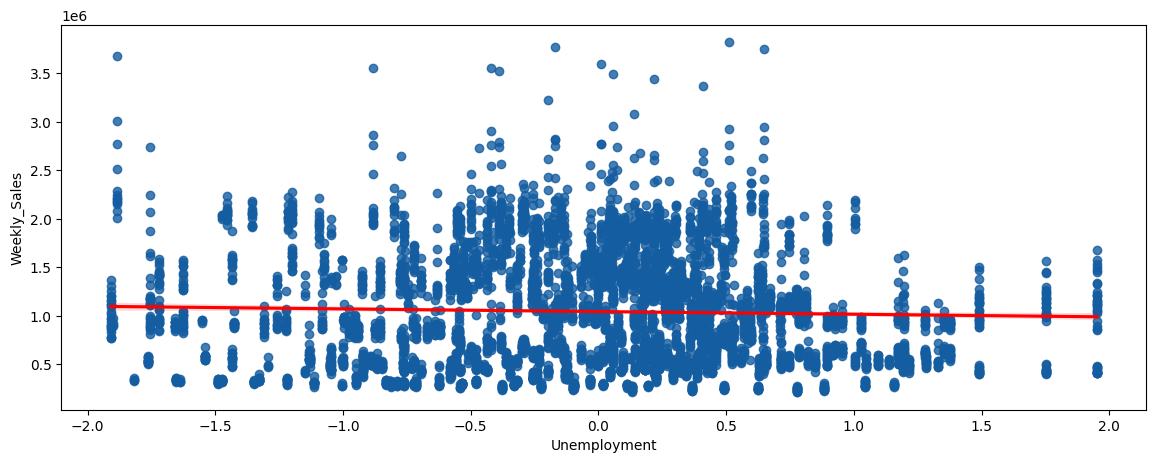

In [41]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [42]:
# CPI vs. Weekly Sales
pearson_coef, p_value = stats.pearsonr(df['CPI'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 5.808095505352465e-06  with a P-value of P = 0.9996435437521263


The correlation coefficient is very close to 0, indicating an extremely weak or negligible linear correlation between the variables.

The p-value is very high (close to 1), specifically P = 0.9926789994996457.

This high p-value suggests that there is no significant evidence to reject the null hypothesis that there is no correlation.

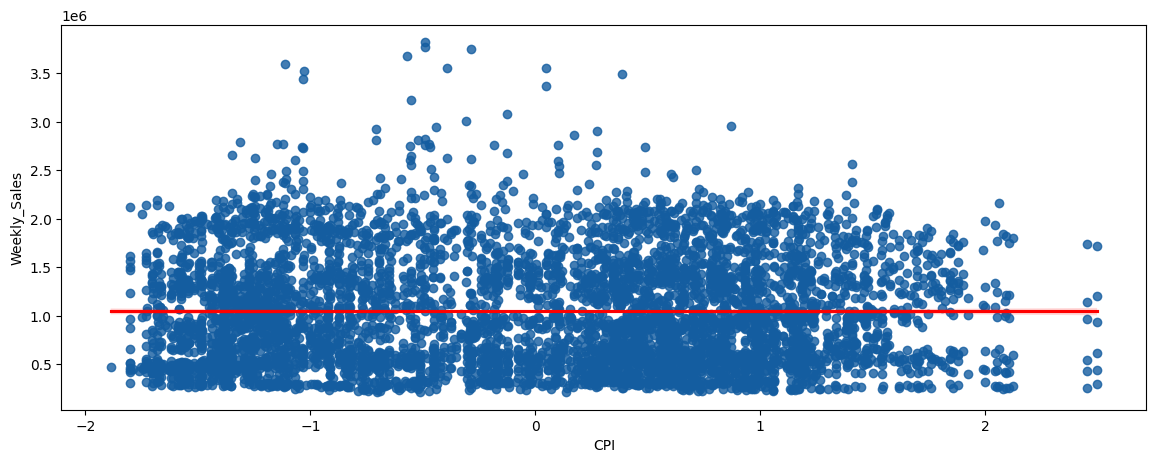

In [43]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'CPI', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [44]:
# Temperature vs. Weekly Sales
pearson_coef, p_value = stats.pearsonr(df['Temperature'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06550522207881446  with a P-value of P = 4.558991709134621e-07


The correlation coefficient is approximately -0.065, indicating a very weak negative linear correlation between the variables
The p-value is very low (close to 0), specifically P = 5.786996617978268e-07. This low p-value suggests that there is significant evidence 
to reject the null hypothesis that there is no correlation.

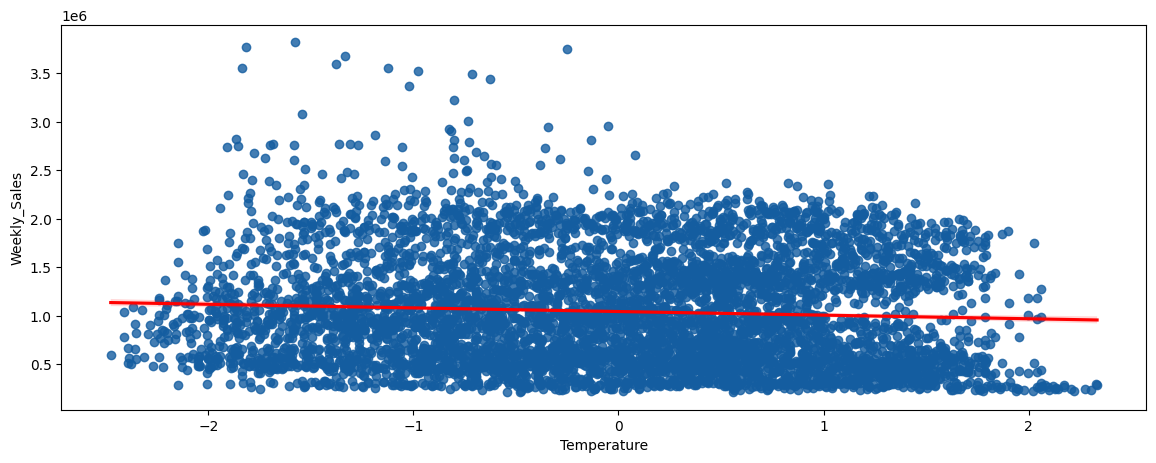

In [45]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Temperature', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

In [46]:
# Correlations with weekly sales
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu") 